# Part II - Prosper Loan Data Exploration
## by Austin Mink

## Investigation Overview


> The overall goal with this dataset was to identify the relationships of financial information and employment status and how they are used by the Prosper company to distribute loans including loan amounts that are available to an individual based on their employment/financial history as well as the APR that is given. 


## Dataset Overview

> The dataset we will be using in this assignment contains a wide range of financially related details associated with individuals who have applied and been approved for loans in regards to the Prosper banking company.

In [79]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [80]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df2 = df[['Term', 'BorrowerAPR', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
    'IsBorrowerHomeowner', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CurrentDelinquencies'
    , 'AmountDelinquent', 'ProsperScore']]
df_loan = df2.dropna()

## (Visualization 1)

- When looking at the univariate histograms of current delinquencies and amount delinquent - it is clear that the actual amount of debt owed has a more consistent distribution where the amount of delinquencies themselves does not appear to have much impact on the amount of approved applicants. This is surprising, but if one were to look at the amount of delinquencies alone it would be misleading as it looks very bad - but when looking at the whole amount of debt of the dataset it shows that even though there are a lot of individuals with many delinquencies, the majority of the dataset has a much smaller amount of debt owed. This is shown clearly in the right-skewed distribution of the amount delinquent histogram.

- When looking at delinquent data, in order to get a clearer picture - the visualizations used did not include individuals with zero delinquency information as it would not give any indication to how much weight each of these  variables carry when determining an applicant's loan availability.


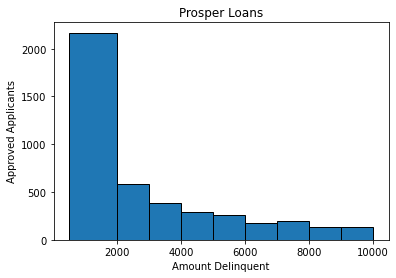

In [81]:
df_loan.hist(column='AmountDelinquent', grid=False, edgecolor='black', bins = [500, 2000, 3000, 4000, 5000, 6000,
                                                                              7000, 8000, 9000, 10000])
vis1 = plt.xlabel('Amount Delinquent')
vis1 = plt.ylabel('Approved Applicants')
vis1 = plt.title('Prosper Loans')

plt.show('vis1')

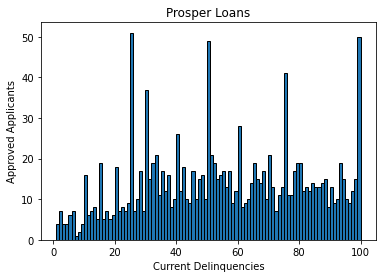

In [82]:
bins = pd.Series(range(1,101))
df_loan.hist(column='AmountDelinquent', grid=False, edgecolor='black', bins=bins)
vis1_2 = plt.xlabel('Current Delinquencies')
vis1_2 = plt.ylabel('Approved Applicants')
vis1_2 = plt.title('Prosper Loans')

plt.show('vis1_2')

## (Visualization 2)

- When looking at the APR spread across employment status and Prosper Score - it is clear that the APR is heavily correlated with prosper score mainly when considering employment status. This is not as clear when looking at employment duration - however, when looking at the average employment duration heatmap, there is a distinct difference in the average duration of employment status amongst the different categories. For example, the average duration of 'Not employed' individuals has a range between around .16 to around .46 whereas self-employed has a range of around .99 to around .116. Although, The employment duration range varies across increasing Prosper Scores so the duration may be outweighed by other factors when determining an applicant's Prosper Score - but each employment status appears to have a required duration range in order to be eligible for a loan in the first place.

- The prosper score is also heavily influenced by the stated monthly income amount as you can see a steady increase in the income amount spread across increasing prosper scores. (see 

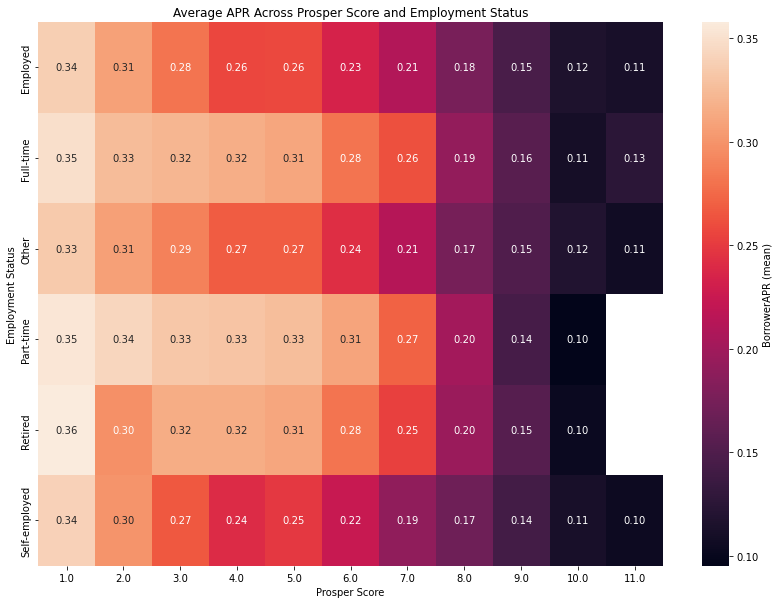

In [83]:
plt.figure(figsize = [14, 10])
df_loan2 = df.copy()
df_loan2 = df_loan2[df_loan2['EmploymentStatus'] != 'Not employed']
avg_score_empl = df_loan2.groupby(['EmploymentStatus', 'ProsperScore']).mean()['BorrowerAPR']
avg_score_empl = avg_score_empl.reset_index(name = 'BorrowerAPR')

avg_score_empl = avg_score_empl.pivot(index = 'EmploymentStatus', columns = 'ProsperScore',
                            values = 'BorrowerAPR')
sb.heatmap(avg_score_empl, annot = True, fmt = '.2f', 
           cbar_kws = {'label' : 'BorrowerAPR (mean)'});
vis2 = plt.title('Average APR Across Prosper Score and Employment Status');
vis2 = plt.xlabel('Prosper Score')
vis2 = plt.ylabel('Employment Status')

plt.show('vis2')

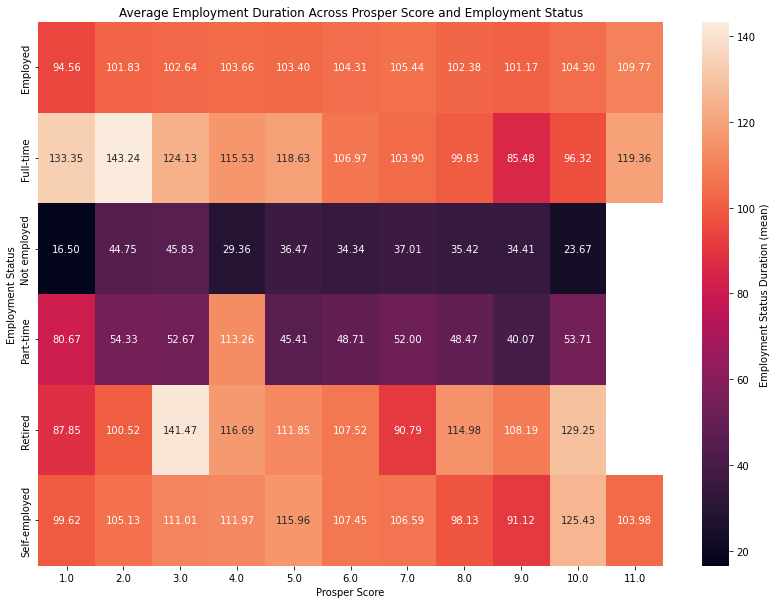

In [84]:
plt.figure(figsize = [14, 10])
df_loanamt = df.copy()
df_loanamt = df_loanamt[df_loanamt['EmploymentStatus'] != 'Other']
avg_score_empl = df_loanamt.groupby(['EmploymentStatus', 'ProsperScore']).mean()['EmploymentStatusDuration']
avg_score_empl = avg_score_empl.reset_index(name = 'EmploymentStatusDuration')

avg_score_empl = avg_score_empl.pivot(index = 'EmploymentStatus', columns = 'ProsperScore',
                            values = 'EmploymentStatusDuration')
vis2_2 = sb.heatmap(avg_score_empl, annot = True, fmt = '.2f', 
           cbar_kws = {'label' : 'Employment Status Duration (mean)'});
vis2_2 = plt.title('Average Employment Duration Across Prosper Score and Employment Status');
vis2_2 = plt.xlabel('Prosper Score')
vis2_2 = plt.ylabel('Employment Status')

plt.show('vis2_2')

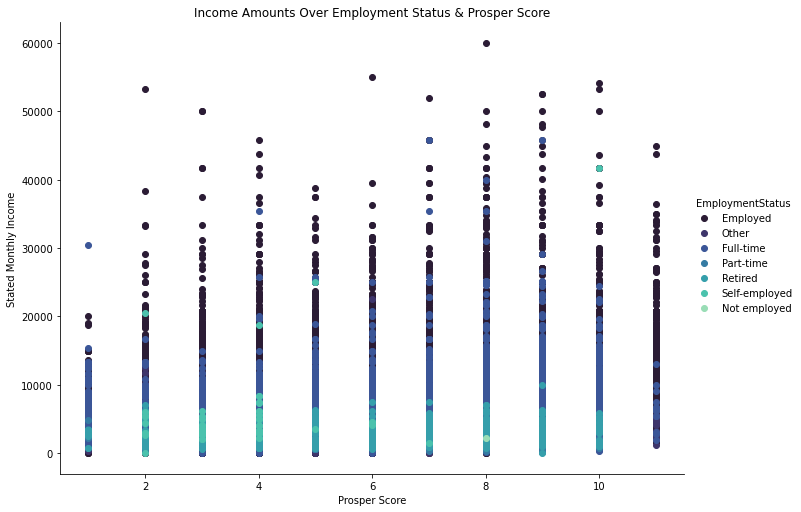

In [85]:
#using segment to get a closer look into income distribution across dataset without as many outliers
df_loan_rng = (df_loan['StatedMonthlyIncome'] <= 60000)
df_loan_seg = df_loan.loc[df_loan_rng]
g = sb.FacetGrid(data = df_loan_seg, hue = 'EmploymentStatus',  height = 7, aspect = 1.4, palette = "mako")
g.map(plt.scatter, 'ProsperScore', 'StatedMonthlyIncome')
plt.xlabel('Prosper Score')
plt.ylabel('Stated Monthly Income')
plt.title('Income Amounts Over Employment Status & Prosper Score')
g.add_legend();

## (Visualization 3)
- Ultimately, the findings indicate that the impact of an approved applicants Prosper Score has more to do with a combination loan amounts and the duration of the agreement terms that become available to them when looking at the average loan amount spread across terms and prosper score heatmap.


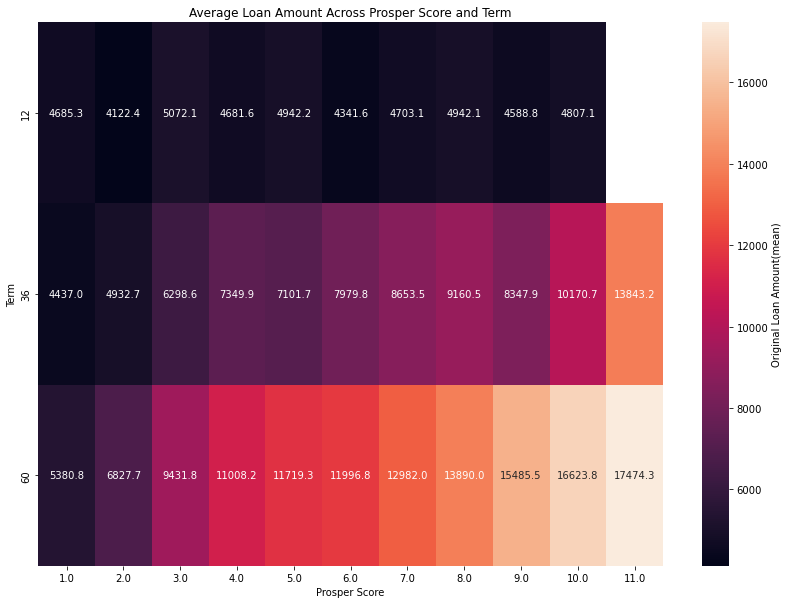

In [86]:
plt.figure(figsize = [14, 10])
df_loanamt = df.copy()
avg_score_empl = df_loanamt.groupby(['Term', 'ProsperScore']).mean()['LoanOriginalAmount']
avg_score_empl = avg_score_empl.reset_index(name = 'LoanOriginalAmount')

avg_score_empl = avg_score_empl.pivot(index = 'Term', columns = 'ProsperScore',
                            values = 'LoanOriginalAmount')
vis3 = sb.heatmap(avg_score_empl, annot = True, fmt = '.1f', 
           cbar_kws = {'label' : 'Original Loan Amount(mean)'});
vis3 = plt.title('Average Loan Amount Across Prosper Score and Term');
vis3 = plt.xlabel('Prosper Score')
vis3 = plt.ylabel('Term')
plt.show('vis3')

In [ ]:
!jupyter nbconvert Part_2_Prosper_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_2_Prosper_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 840886 bytes to Part_2_Prosper_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_2_Prosper_Slide_Deck.slides.html
Use Control-C to stop this server
